In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
def make_feature_label_lineplots(feature_list):
    plot_index = 1
    for feature in feature_list:
        plt.subplot(len(feature_list),1,plot_index)
        plot_df = energy_df_day.groupby(by = feature).mean().reset_index()
        plot_df.reset_index(inplace = True)
        sns.lineplot(x = plot_df[feature],y = plot_df['POWER'])
        plot_index += 1

In [3]:
def make_feature_label_scatterplots(feature_list):
    plot_index = 1
    for feature in feature_list:
        plt.subplot(len(feature_list),1,plot_index)
        plt.scatter(x = energy_df_day[feature],y = energy_df_day['POWER'],alpha = .2)
        plt.xlabel(str(feature))
        plt.ylabel('Power')
        plot_index += 1

In [4]:
def make_feature_histograms(histogram_feature_list):
    plot_index = 1
    for feature in feature_list:
        plt.subplot(len(feature_list),1,plot_index)
        plt.hist(energy_df[feature],bins = 100)
        plt.xlabel(str(feature))
        plot_index += 1
    

In [5]:
def make_monthly_hourly_plots():
    plot_index = 1
    plt.figure(figsize = (40,100))
    month_list = ['','Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
    sns.set(font_scale = 3)
    for month in range(1,13):
        plt.subplot(12,1,plot_index)
        plt.xticks(range(24))
        ax1 = sns.lineplot(x = 'HOUR',y = 'POWER' ,data = energy_df[energy_df['MONTH'] == month])
        ax1.set_xlabel(month_list[month])
        plot_index+=1

In [6]:
energy_df = pd.read_csv(r'C:/Users/Kyle/Documents/Solar_Zone_1.csv')
energy_df = energy_df[energy_df['ZONEID'] == 1]
energy_df.drop(columns = ['ZONEID.1','TIMESTAMP.1'],inplace = True)

In [7]:

energy_df.drop(columns = 'ZONEID',inplace = True)

#Converting Timestamp column to useful features that the model can learn from.
date_list = energy_df['TIMESTAMP'].tolist()
date_time_list = []
for date in date_list:
    date_time_list.append(datetime.datetime.strptime(str(date), '%Y%m%d %H:%M'))

energy_df['DATETIME'] = date_time_list

energy_df.drop(columns = 'TIMESTAMP',inplace = True)

energy_df['HOUR'] = pd.to_datetime(energy_df['DATETIME']).dt.hour
energy_df['DAY'] = pd.to_datetime(energy_df['DATETIME']).dt.day
energy_df['MONTH'] = pd.to_datetime(energy_df['DATETIME']).dt.month
energy_df['WEEKDAY'] = pd.to_datetime(energy_df['DATETIME']).dt.weekday

energy_df.drop(columns = 'DATETIME',inplace = True)

#Renaming features to more intuitive names
energy_df.columns = ['POWER','TCLW','TCIW','SURFACE PRESSURE','HUMIDITY','CLOUD COVER',
                     'U WIND COMPONENT','V WIND COMPONENT','TEMPERATURE','SSRD','STRD','TSR','PRECIPITATION',
                     'HOUR','DAY','MONTH','WEEKDAY']

In [8]:
energy_df['Nighttime'] = 0
for i in range(len(energy_df)):
    if energy_df['MONTH'][i] in range(1,3)  and energy_df['HOUR'][i] in range(10,20):
        energy_df['Nighttime'][i] = 1
    elif energy_df['MONTH'][i] == 3 and energy_df['HOUR'][i] in range(9,21):
        energy_df['Nighttime'][i] = 1
    elif energy_df['MONTH'][i] in range(4,9) and energy_df['HOUR'][i] in range(8,22):
        energy_df['Nighttime'][i] = 1  
    elif energy_df['MONTH'][i] in range(9,11) and energy_df['HOUR'][i] in range(9,21):
        energy_df['Nighttime'][i] = 1
    elif energy_df['MONTH'][i] in range(11,13) and energy_df['HOUR'][i] in range(10,20):
        energy_df['Nighttime'][i] = 1


C:\Users\Kyle\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kyle\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Kyle\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':

In [9]:
energy_df_day = energy_df[energy_df['Nighttime'] == 0]

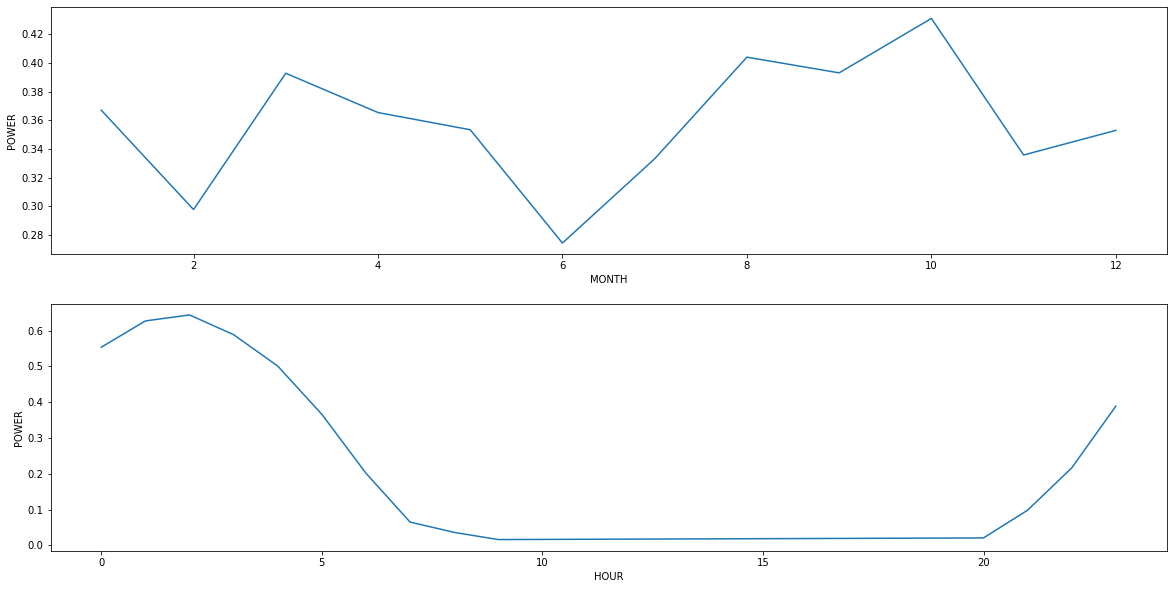

In [10]:
plt.figure(figsize = (20,10))
make_feature_label_lineplots(['MONTH','HOUR'])

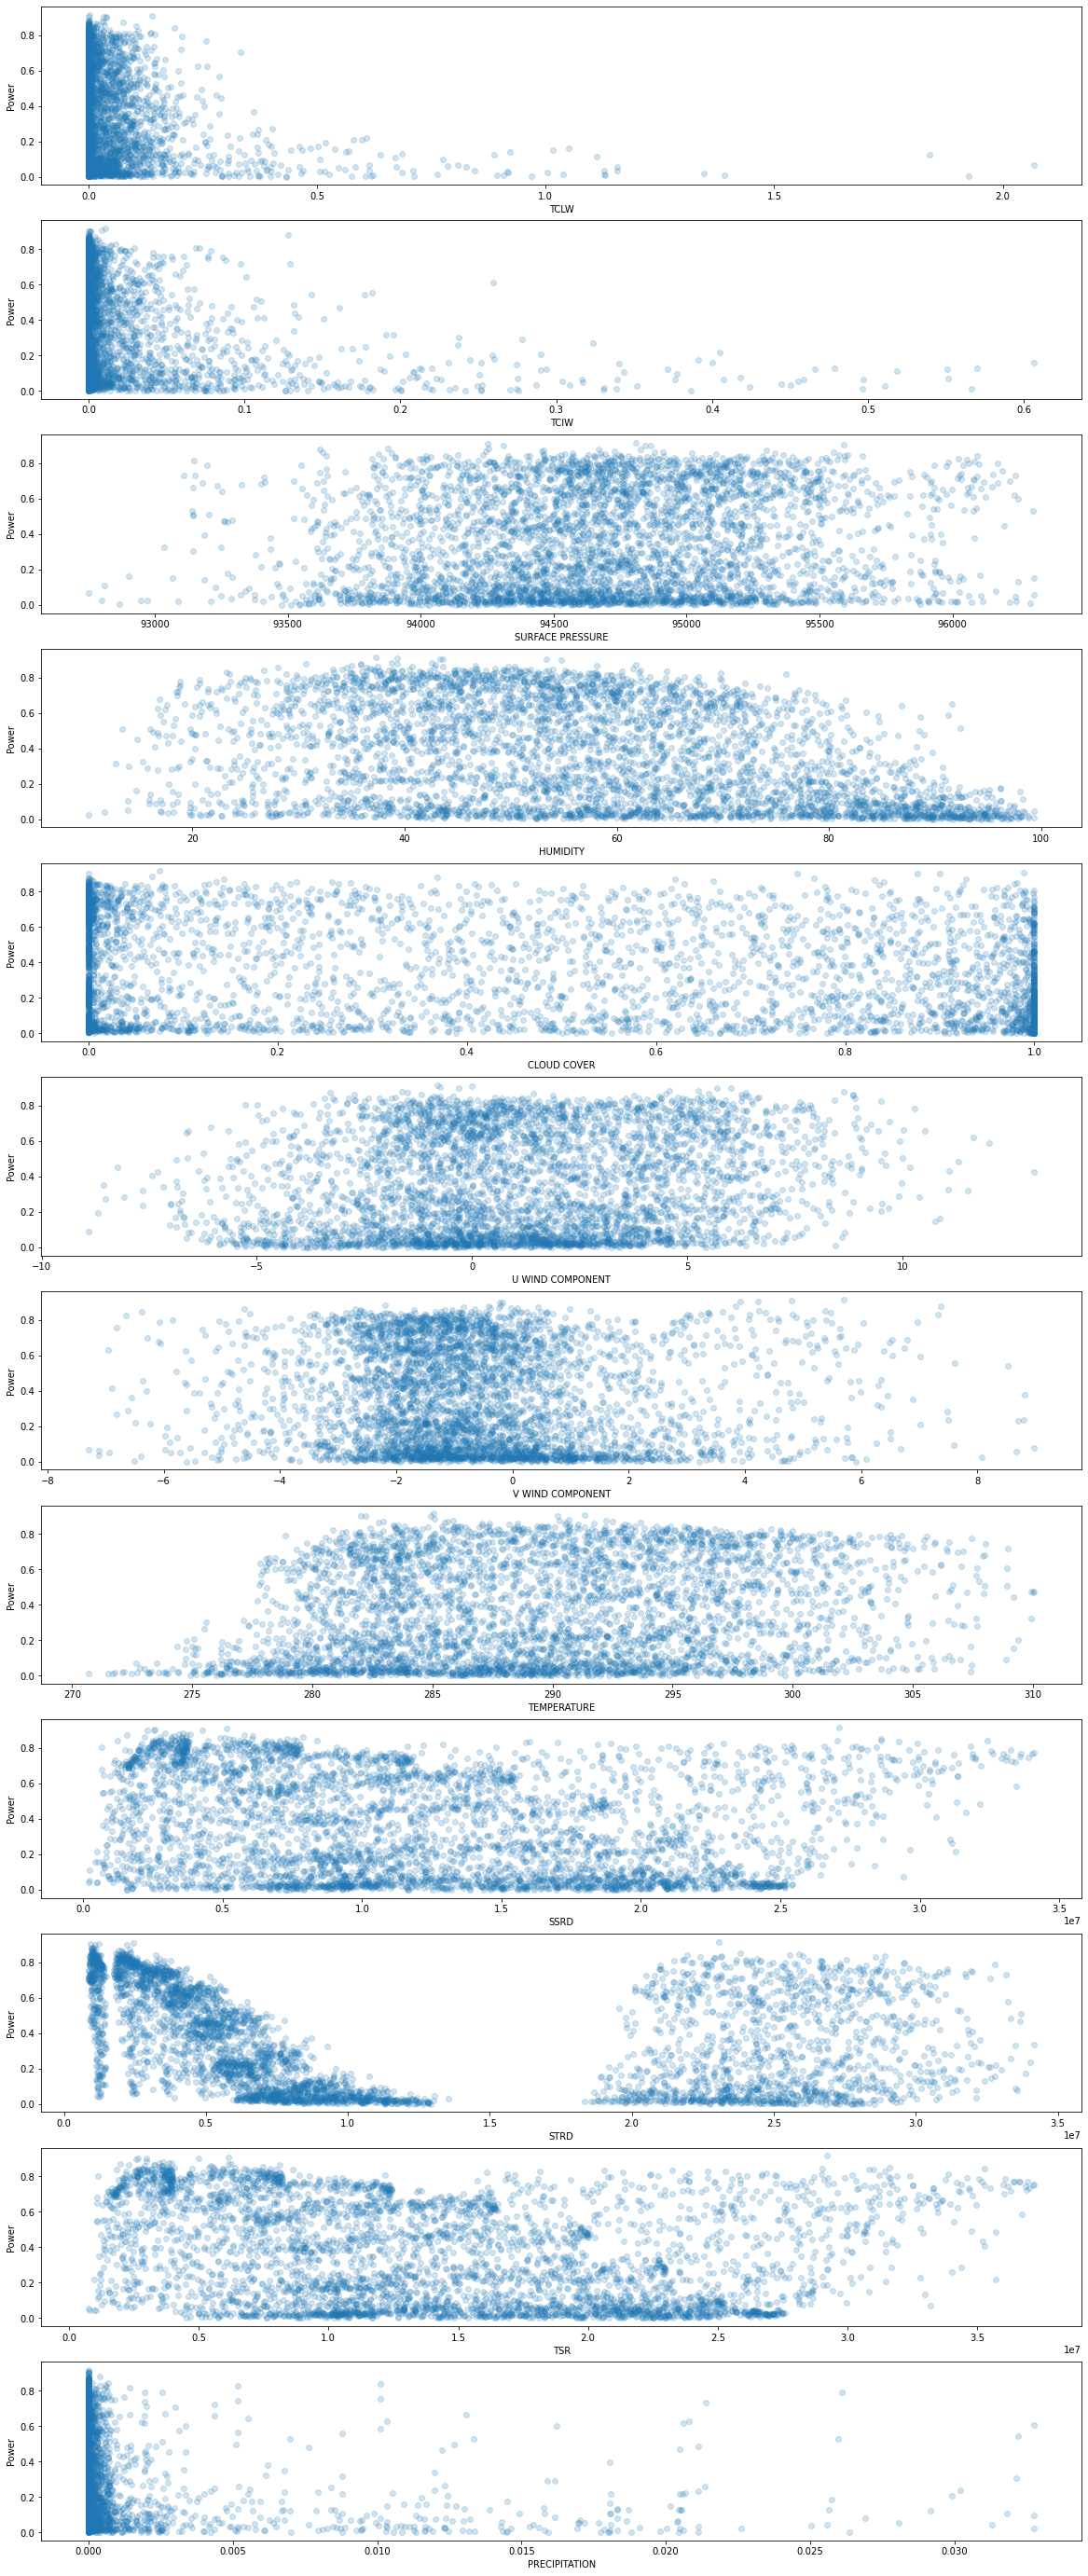

In [11]:
plt.figure(figsize = (20,50))
make_feature_label_scatterplots(energy_df_day.drop(columns = ['HOUR','MONTH','DAY','POWER','WEEKDAY','Nighttime']).columns)

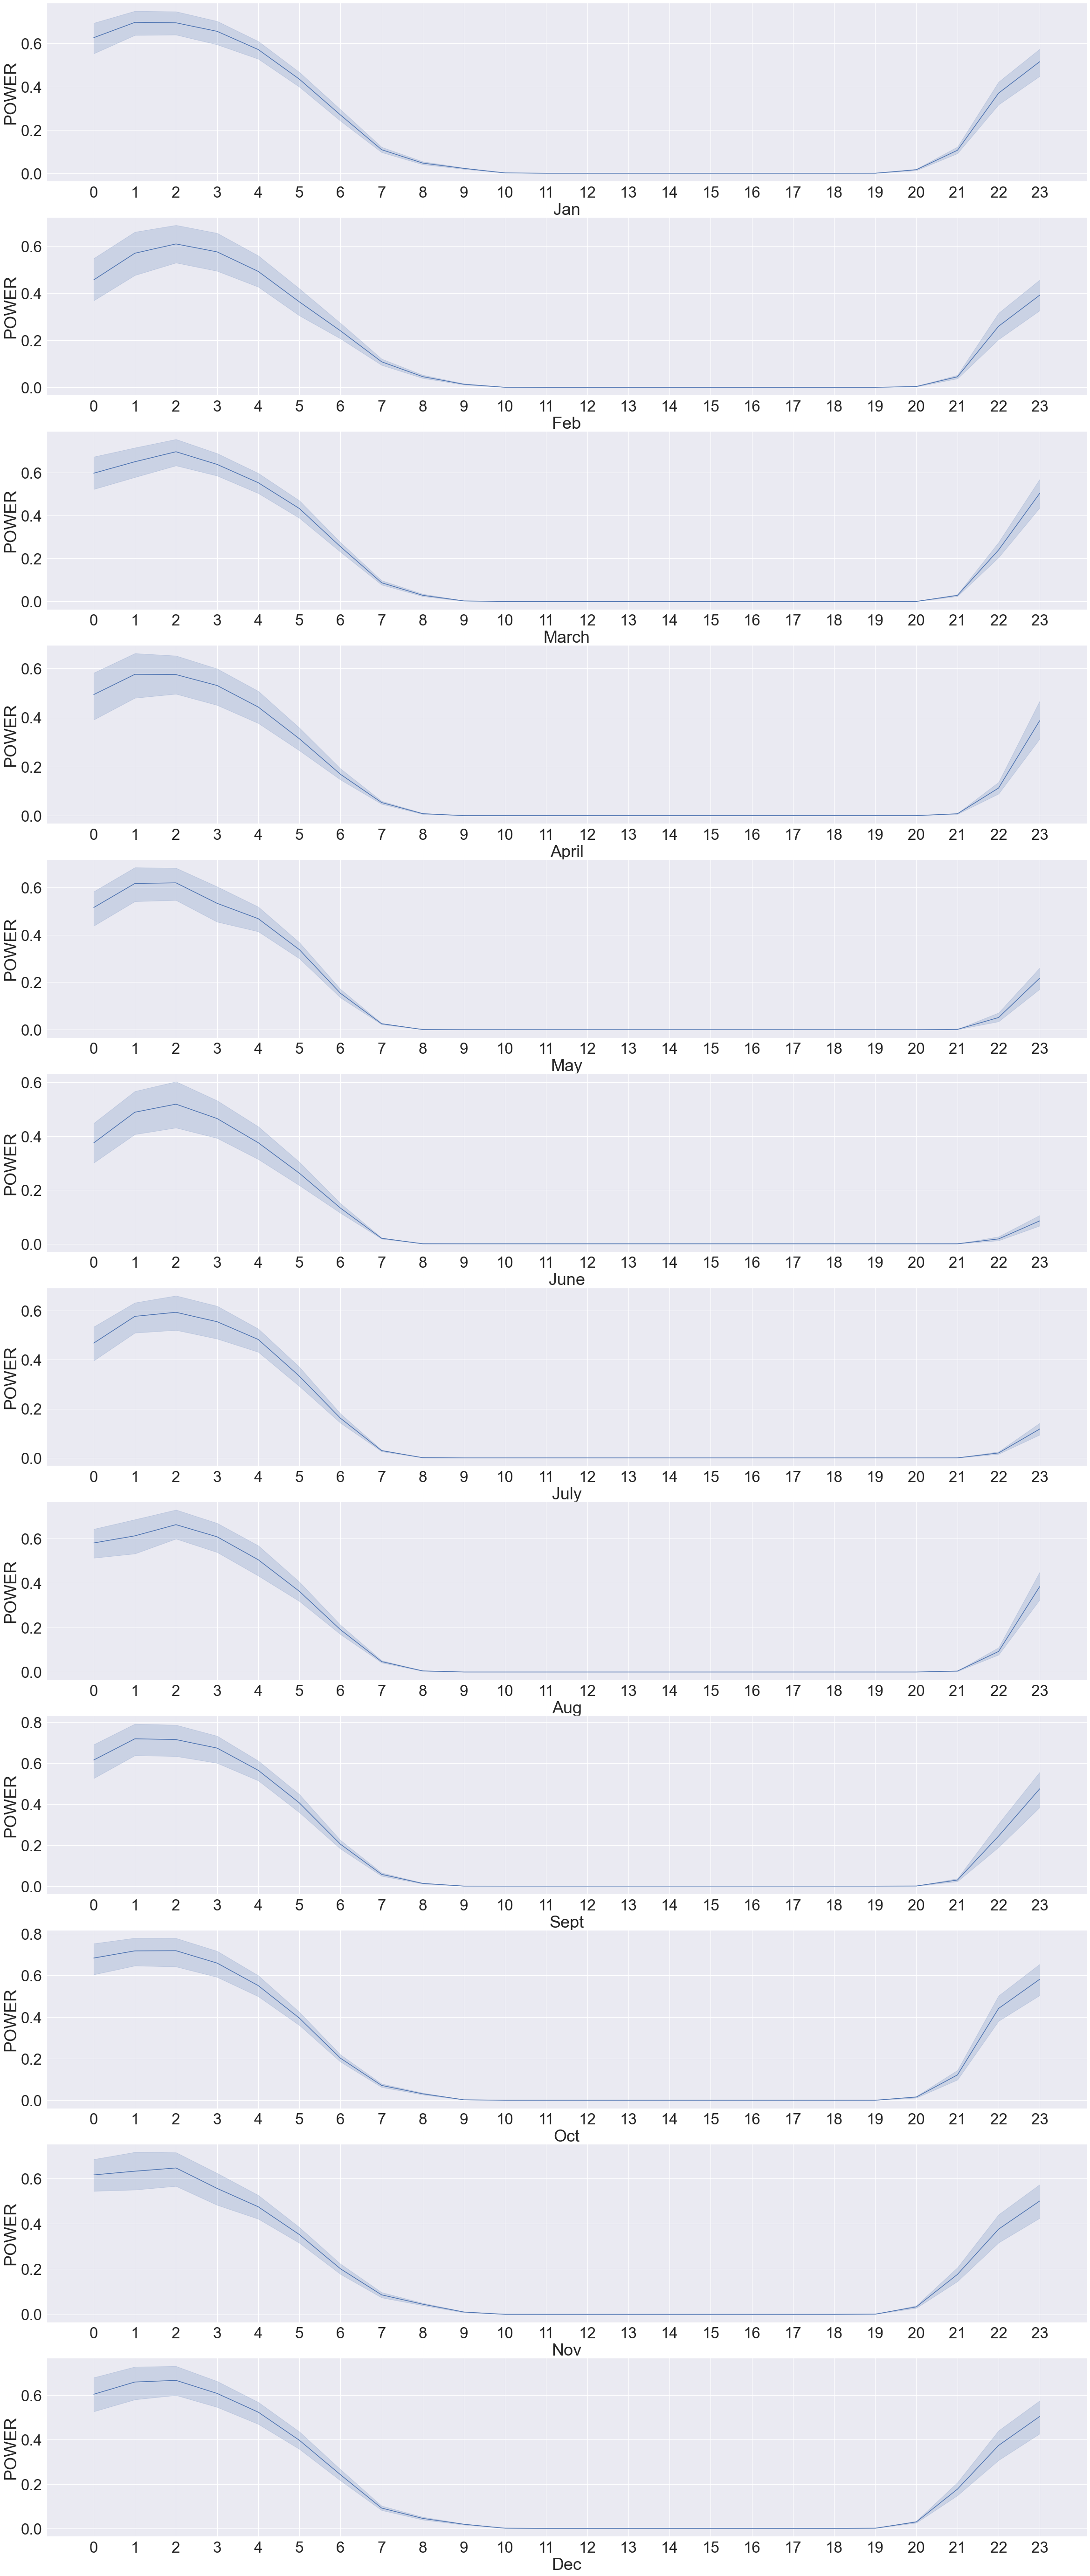

In [12]:
make_monthly_hourly_plots()

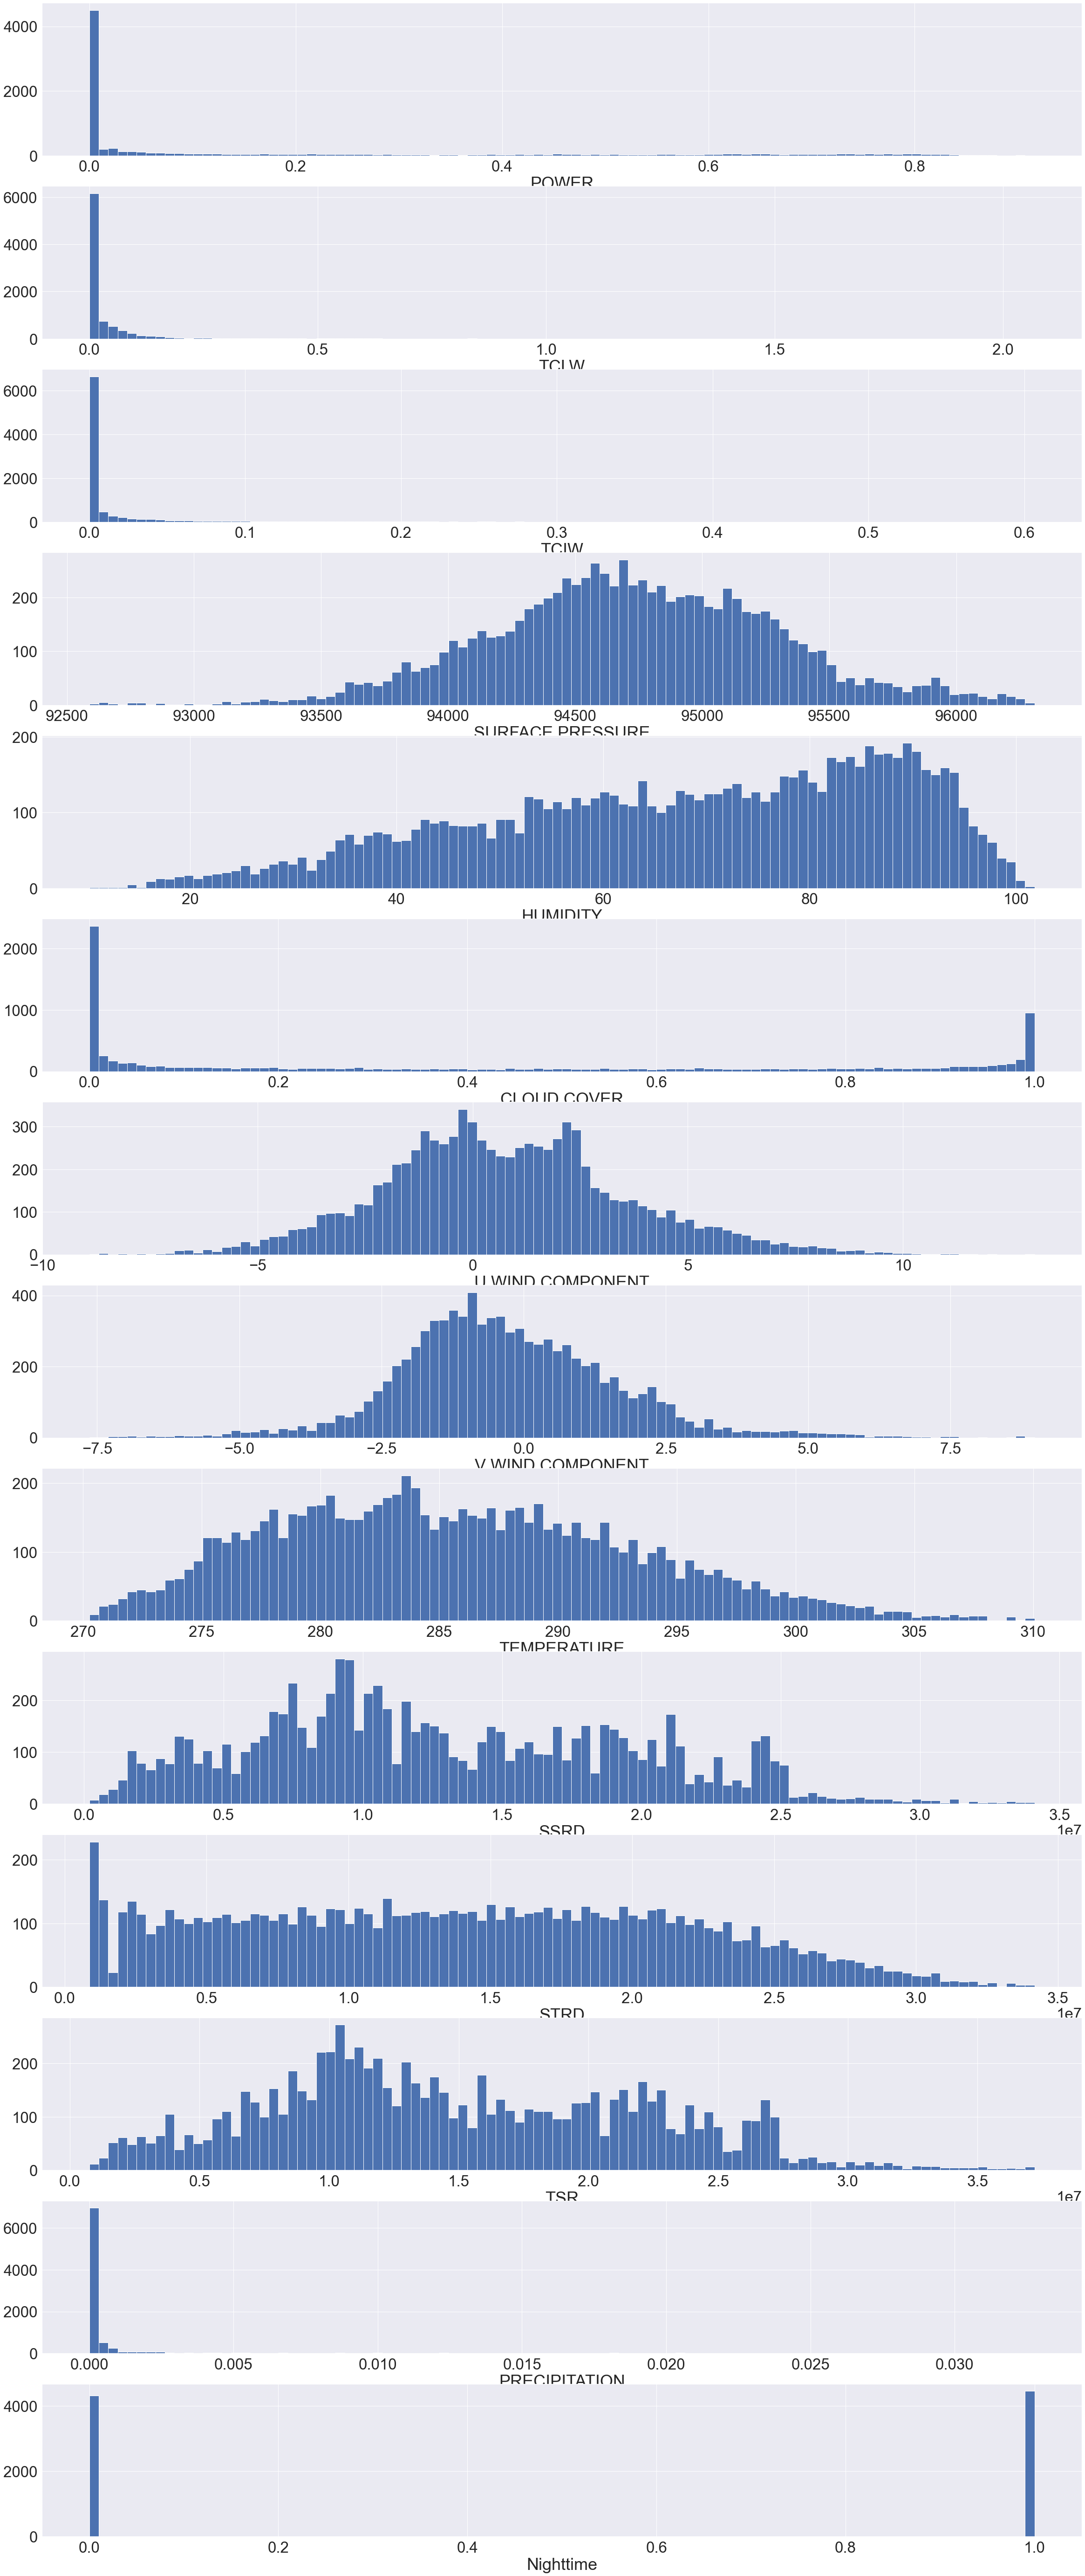

In [15]:
plt.figure(figsize = (40,100))
feature_list = energy_df.drop(columns = ['MONTH','WEEKDAY','HOUR','DAY']).columns
make_feature_histograms(feature_list)

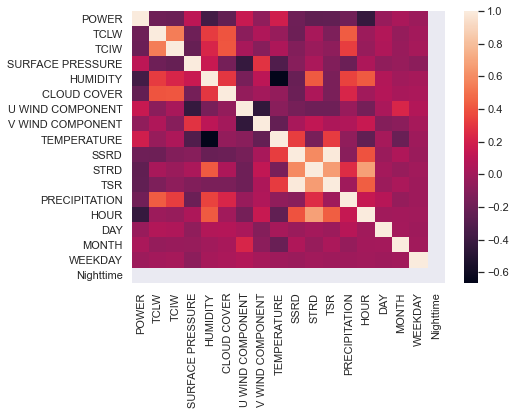

In [16]:
plt.figure(figsize = (7,5))
sns.set(font_scale = 1)
sns.heatmap(energy_df_day.corr())
plt.savefig('solar_heatmap')

C:\Users\Kyle\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

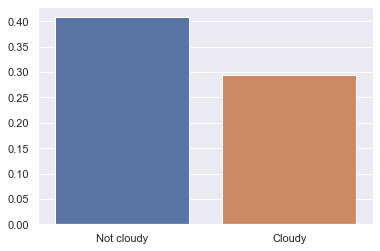

In [17]:
not_cloudy_avg = energy_df_day[energy_df_day['CLOUD COVER'] <= .5]['POWER'].mean()
cloudy_avg = energy_df_day[energy_df_day['CLOUD COVER'] > .5]['POWER'].mean()
sns.barplot(['Not cloudy','Cloudy'],[not_cloudy_avg,cloudy_avg])